In [1]:
from shapely.geometry import Point, MultiPoint
from pandas import DataFrame

l01 = [
('6a',132.0273,105.5994,99.712),
('7',140.6679,108.2610,99.491),
('7b',155.1098,112.1205,99.859),
('8',167.3911,121.9081,99.442),
('7a',152.7813,117.7490,99.344),
('6',106.5573,104.7235,99.168),
('4',71.6973,94.9087,98.827),
('3',59.8198,92.2469,99.566),
('1',24.9824,81.6378,99.200),
('2',36.3929,79.0028,99.096),
('4a',83.3876,92.3797,98.843),
('5',91.5350,94.6927,98.841)
]

d01 = {i[0]:i[1:3] for i in l01} 

l01df = DataFrame.from_records(l01,index='Num',columns=('Num','X','Y','Z'))
l01df

,X,Y,Z
Num,,,
6a,132.0273,105.5994,99.712
7,140.6679,108.2610,99.491
7b,155.1098,112.1205,99.859
8,167.3911,121.9081,99.442
7a,152.7813,117.7490,99.344
6,106.5573,104.7235,99.168
4,71.6973,94.9087,98.827
3,59.8198,92.2469,99.566
1,24.9824,81.6378,99.200


In [2]:
l02= [
('9',187.7875,121.8411,99.457),
('9a',199.7531,130.8149,99.505),
('12',236.4435,162.5061,99.815),
('13',252.3337,183.4717,100.045),
('11',212.8954,149.5616,99.758),
('9b',196.0612,135.0250,99.701),
('8',172.1918,114.6797,99.437),
('7a',160.7087,104.7360,99.342),
('6',124.3194,73.3954,99.176),
('6a',147.0338,84.9535,99.714),
('7',153.7402,91.0169,99.491),
('7b',165.1976,100.6186,99.856),
('9002',187.7875,121.8411)    
]

d02 = {i[0]:i[1:3] for i in l02} 

l02df = DataFrame.from_records(l02,index='Num',columns=('Num','X','Y','Z'))
l02df

,X,Y,Z
Num,,,
9,187.7875,121.8411,99.457
9a,199.7531,130.8149,99.505
12,236.4435,162.5061,99.815
13,252.3337,183.4717,100.045
11,212.8954,149.5616,99.758
9b,196.0612,135.0250,99.701
8,172.1918,114.6797,99.437
7a,160.7087,104.7360,99.342
6,124.3194,73.3954,99.176


In [3]:
d1k = set(d01.keys())
d2k = set(d02.keys())

interl = list(d1k.intersection(d2k))

mp01 = MultiPoint([d01[i] for i in interl])

mp02 = MultiPoint([d02[i] for i in interl])


In [4]:
print(mp01)
list(mp01.geoms)[2].x

MULTIPOINT (132.0273 105.5994, 155.1098 112.1205, 152.7813 117.749, 140.6679 108.261, 106.5573 104.7235, 167.3911 121.9081)


152.7813

In [5]:
from shapely import affinity

mp01_r = affinity.rotate(mp01,90)

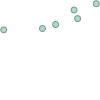

In [6]:
mp01

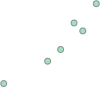

In [7]:
mp02

In [8]:
mp01.distance(mp02)

8.677354841770628

In [10]:
mp02_s = affinity.translate(mp02)
print(mp02_s)

MULTIPOINT (147.0338 84.95350000000001, 165.1976 100.6186, 160.7087 104.736, 153.7402 91.01690000000001, 124.3194 73.3954, 172.1918 114.6797)


In [11]:
def rot_mov(x,y,angle):
    mp02_r = affinity.rotate(mp02,angle)
    mp02_s = affinity.translate(mp02_r,x,y)
    return mp02_s
def calc_n_dist(x,y,angle):
    mp02_r = affinity.rotate(mp02,angle)
    mp02_s = affinity.translate(mp02_r,x,y)
    mp02_s
    return mp01.distance(mp02_s)
def fun1(x):
    return calc_n_dist(*x)

x0 = (0,0,0)

In [12]:
from scipy.optimize import minimize

x0 = (0,0,0)

res = minimize(fun1, x0, method='SLSQP')

In [13]:
print(res)

     fun: 7.341010251572272e-07
     jac: array([ 0.5959028 , -0.8037207 , -0.28315982,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 153
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([-4.72931206,  6.44857157,  4.45966978])


In [14]:
calc_n_dist(-4.72931217,  6.44857168,  4.45966921)

7.378127117747837e-07

In [15]:
def return_coords(l,geom):
    nd = zip(l,geom.geoms)
    nd2 = [(i[0],i[1].x,i[1].y) for i in nd]
    return nd2
    

In [16]:
mp02_r = affinity.rotate(mp02,4.45966921)
mp02_s = affinity.translate(mp02_r, -4.72931217,  6.44857168)
z = return_coords(interl,mp02_s)

In [17]:
def calc_n_dist2(x,y,angle):
    mp02_r = affinity.rotate(mp02,angle)
    mp02_s = affinity.translate(mp02_r,x,y)
    dist = 0
    nz = zip(mp01,mp02_s)
    for i in nz:
        dist+=i[0].distance(i[1])
    return dist
def fun2(x):
    return calc_n_dist2(*x)

In [18]:
x0 = (0,0,0)
res = minimize(fun2, x0, method='SLSQP')


In [19]:
print(res)

     fun: 0.0019270817104233625
     jac: array([-0.15732094,  0.59199386,  0.0016585 ,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 191
     nit: 32
    njev: 32
  status: 0
 success: True
       x: array([-11.28185288,  19.27841926, -25.00025238])


В итоге координаты стоянки 990002 принимают следующий вид:

In [20]:
from pandas import DataFrame

mpf = rot_mov(-11.28185287,  19.27841932, -25.00025205)
z = return_coords(interl,mpf)
DataFrame.from_records(z,index='Num',columns=('Num','X','Y'))

,X,Y
Num,,
6a,132.027301,105.599401
7b,155.109680,112.120348
7a,152.781468,117.749081
7,140.667879,108.260422
6,106.556395,104.723837
8,167.391099,121.908102


Для сравнения, еще раз координаты точек со стоянки 990001

In [21]:
l01df

,X,Y,Z
Num,,,
6a,132.0273,105.5994,99.712
7,140.6679,108.2610,99.491
7b,155.1098,112.1205,99.859
8,167.3911,121.9081,99.442
7a,152.7813,117.7490,99.344
6,106.5573,104.7235,99.168
4,71.6973,94.9087,98.827
3,59.8198,92.2469,99.566
1,24.9824,81.6378,99.200


In [32]:
mp02 = MultiPoint([[i[1],i[2]] for i in l02])
mpf = rot_mov(-11.28185287,  19.27841932, -25.00025205)
keyzz = [i[0] for i in l02]
z = return_coords(keyzz,mpf)
DataFrame.from_records(z,index='Num',columns=('Num','X','Y'))

,X,Y
Num,,
9,173.770037,141.965007
9a,188.407059,145.041087
12,235.053192,158.256830
13,258.315103,170.542525
11,208.240776,156.477104
9b,186.840350,150.417004
8,156.608995,142.065678
7a,141.999364,137.906657
6,95.774291,124.881413
